# Final assignment Unsupervised Machine Learning
- Course: Data Science 3
- Programme: Data Science for Life Sciences 2021-2022
- University: Hanzehogeschool Groningen
- Lecturer: Fenna Feenstra

By Jan Rombouts

Student number: 439738

# Introduction

This notebook contains gene expression data of lung cancer tumors. The data was attempted to cluster with hierarchical clustering and OPTICS.

The datasets were downloaded from: 
- https://wiki.cancerimagingarchive.net/download/attachments/16056856/Lung3.metadata.xls?version=1&modificationDate=1404237338168&api=v2
- https://ftp.ncbi.nlm.nih.gov/geo/series/GSE58nnn/GSE58661/matrix/

References:
- __Data__: _Aerts HJWL, Rios Velazquez E, Leijenaar RTH, Parmar C, Grossmann P, Carvalho S, Bussink J, Monshouwer R, Haibe-Kains B, Rietveld D, Hoebers F, Rietbergen MM, Leemans CR, Dekker A, Quackenbush J, Gillies RJ, & Lambin P. (2015). Data From NSCLC-Radiomics-Genomics. The Cancer Imaging Archive._ https://doi.org/10.7937/K9/TCIA.2015.L4FRET6Z
- __Related publication__: _Aerts HJWL, Rios Velazquez E, Leijenaar RTH, Parmar C, Grossmann P, Carvalho S, Bussink J, Monshouwer R, Haibe-Kains B, Rietveld D, Hoebers F, Rietbergen MM, Leemans CR, Dekker A, Quackenbush J, Gillies RJ, & Lambin P. (2014) Decoding tumour phenotype by noninvasive imaging using a quantitative radiomics approach. Nature Communications 5, 4006 ._ https://doi.org/10.1038/ncomms5006
- __TCIA__: _Clark K, Vendt B, Smith K, Freymann J, Kirby J, Koppel P, Moore S, Phillips S, Maffitt D, Pringle M, Tarbox L, Prior F. The Cancer Imaging Archive (TCIA): Maintaining and Operating a Public Information Repository, Journal of Digital Imaging, Volume 26, Number 6, December, 2013, pp 1045-1057._ https://doi.org/10.1007/s10278-013-9622-7


In [1]:
# Required Pyton libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets

## Gene data

In [2]:
# Read in Gene data, skip last row without data
gene = pd.read_csv('data/GSE58661_series_matrix.txt', sep='\t', header=61, index_col=0).iloc[:-1]
gene.head()

,GSM1416528,GSM1416529,GSM1416530,GSM1416531,GSM1416532,GSM1416533,GSM1416534,GSM1416535,GSM1416536,GSM1416537,...,GSM1416607,GSM1416608,GSM1416609,GSM1416610,GSM1416611,GSM1416612,GSM1416613,GSM1416614,GSM1416615,GSM1416616
ID_REF,,,,,,,,,,,,,,,,,,,,,
AFFX-BioB-3_at,7.376915,8.024915,7.522543,7.152864,7.211031,7.704962,7.779374,7.136893,7.160221,8.141578,...,7.611992,7.345206,7.316975,7.418340,7.756286,7.215856,7.465109,7.245458,7.039592,7.393667
AFFX-BioB-5_at,6.984530,7.427048,7.077207,6.849513,6.753131,7.195947,7.429800,6.745630,6.751358,7.632631,...,7.175015,7.014479,6.913879,6.898449,7.347570,6.740992,7.080787,6.725812,6.575376,7.041106
AFFX-BioB-M_at,7.330576,8.010530,7.334551,7.143286,7.077163,7.753484,7.712429,7.036303,7.089186,7.992361,...,7.612393,7.285821,7.324635,7.408880,7.745624,7.152722,7.422373,7.263596,6.975162,7.366620
AFFX-BioC-3_at,10.922741,11.390638,10.936703,10.791909,10.701328,11.221732,11.084229,10.588372,10.628909,11.412668,...,11.097486,10.908682,10.781228,10.935723,11.200635,10.707980,10.736531,10.770440,10.367009,10.753221
AFFX-BioC-5_at,11.032030,11.533338,11.018510,10.875259,10.823792,11.276973,11.178643,10.700420,10.779332,11.470336,...,11.265739,10.990373,10.900765,11.101546,11.343329,10.842697,10.900509,10.838008,10.494806,10.863600


In [3]:
print(f'Shape of gene: {gene.shape[0]} rows and {gene.shape[1]} columns')

Shape of gene: 60607 rows and 89 columns


## Metadata

In [4]:
# Read in Meta data
meta = pd.read_excel('data/Lung3.metadata.xls')
meta.head()

,sample.name,title,CEL.file,source.location,organism,characteristics.tag.gender,characteristics.tag.histology,characteristics.tag.tumor.size.maximumdiameter,characteristics.tag.stage.primary.tumor,characteristics.tag.stage.nodes,characteristics.tag.stage.mets,characteristics.tag.primaryVSmets,characteristics.tag.grade,molecule tested,label,platform
0,LUNG3-01,lung_1,LUNG3-01.CEL,Left Lower Lobe,Homo sapiens,M,"Squamous Cell Carcinoma, NOS",4.0,pT2,pN0,pM0,Primary,3,total RNA,biotin,GPL15048
1,LUNG3-02,lung_2,LUNG3-02.CEL,Left Lower Lobe,Homo sapiens,M,"Adenocarcinoma, Papillary, NOS",1.3,pT1,pNX,pMX,Primary,Not Available,total RNA,biotin,GPL15048
2,LUNG3-03,lung_3,LUNG3-03.CEL,Left Lower Lobe,Homo sapiens,M,Non-Small Cell,11.0,pT3,pN0,pM0,Primary,3,total RNA,biotin,GPL15048
3,LUNG3-04,lung_4,LUNG3-04.CEL,Left Lower Lobe,Homo sapiens,M,"Papillary Type AND Adenocarcinoma, Bronch...",NaN,pTX,pNx,pM1,Primary,Not Available,total RNA,biotin,GPL15048
4,LUNG3-05,lung_5,LUNG3-05.CEL,Left Lower Lobe,Homo sapiens,F,"Squamous Cell Carcinoma, NOS",7.8,pT3,pN0,pM0,Primary,2,total RNA,biotin,GPL15048


In [5]:
# Remove useless features columns
drop_cols = ['sample.name', 'CEL.file',
            'organism', 'label',
            'platform', 'molecule tested',
            'characteristics.tag.grade',
            'characteristics.tag.primaryVSmets']
meta = meta.drop(columns=drop_cols)

In [6]:
# remove prefix part of metadata columns
meta.columns = meta.columns.str.replace('characteristics.tag.', '', regex=True)

In [7]:
meta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   title                       89 non-null     object 
 1   source.location             89 non-null     object 
 2   gender                      89 non-null     object 
 3   histology                   89 non-null     object 
 4   tumor.size.maximumdiameter  88 non-null     float64
 5   stage.primary.tumor         89 non-null     object 
 6   stage.nodes                 89 non-null     object 
 7   stage.mets                  89 non-null     object 
dtypes: float64(1), object(7)
memory usage: 5.7+ KB


In [8]:
meta.head()

,title,source.location,gender,histology,tumor.size.maximumdiameter,stage.primary.tumor,stage.nodes,stage.mets
0,lung_1,Left Lower Lobe,M,"Squamous Cell Carcinoma, NOS",4.0,pT2,pN0,pM0
1,lung_2,Left Lower Lobe,M,"Adenocarcinoma, Papillary, NOS",1.3,pT1,pNX,pMX
2,lung_3,Left Lower Lobe,M,Non-Small Cell,11.0,pT3,pN0,pM0
3,lung_4,Left Lower Lobe,M,"Papillary Type AND Adenocarcinoma, Bronch...",NaN,pTX,pNx,pM1
4,lung_5,Left Lower Lobe,F,"Squamous Cell Carcinoma, NOS",7.8,pT3,pN0,pM0


In [9]:
# several columns have data that can be changed to categorical data
cat_cols = ["source.location", "gender"]
for col in cat_cols:
    print(f'{col} unique data: \n {meta[col].unique()}')

source.location unique data: 
 ['Left  Lower Lobe' 'Right    Lower Lobe' 'Left  Upper Lobe'
 'Right    Upper Lobe' 'Right    Middle Lobe']
gender unique data: 
 ['M' 'F']


Except for tumor size, all features are of object type currently. To fix this, the features could be mapped to numeric data for sklearn to be able to handle it. However, because the tumor, node, and mets stage are diagnosed by doctors currently, those are not taken into account for this analysis. The aim is to find a model that can predict the histology (and possibly its size), and these features would basically give the answer already (assuming a competent doctor).

The location where the sample for gene expression analysis was taken does not add information to our analysis, so that feature is removed. That leaves gender, which can be changed to numerical values as 0 for males and 1 for females

In [10]:
meta = meta.drop(columns=['source.location'])
meta['gender'] = meta['gender'].map({'M':0, 'F':1}).astype('float64')
meta.head()

,title,gender,histology,tumor.size.maximumdiameter,stage.primary.tumor,stage.nodes,stage.mets
0,lung_1,0.0,"Squamous Cell Carcinoma, NOS",4.0,pT2,pN0,pM0
1,lung_2,0.0,"Adenocarcinoma, Papillary, NOS",1.3,pT1,pNX,pMX
2,lung_3,0.0,Non-Small Cell,11.0,pT3,pN0,pM0
3,lung_4,0.0,"Papillary Type AND Adenocarcinoma, Bronch...",NaN,pTX,pNx,pM1
4,lung_5,1.0,"Squamous Cell Carcinoma, NOS",7.8,pT3,pN0,pM0


In [11]:
# Check all unique values for the labels we want to cluster / predict
meta.histology.value_counts()

Squamous Cell Carcinoma, NOS                                            33
Adenocarcinoma, NOS                                                     25
Non-Small Cell                                                           7
Adenocarcinoma, Papillary, NOS                                           4
Adenocarcinoma, Bronchiolo-alveolar Features                             4
Adenocarcinoma, Acinar Type                                              3
Solid Type And Acinar                                                    2
Adenocarcinoma With Papillary Features                                   2
Adenocarcinoma, Mixed                                                    1
Adenocarcinoma, Mucinous With Bronchiolo-alveolar Features               1
Squamous Cell Carcinoma, Other (Specify) with adeno features             1
Adenocarcinoma With Mucinous Features                                    1
Papillary Type AND      Adenocarcinoma, Bronchiolo-alveolar Features     1
Carcinoma, Large Cell, Ne

In [12]:
# There are many invididual cases. For proper analysis it is preferred to arrange these in a few larger groups
meta.loc[meta['histology'].str.contains('Adenocarcinoma'), 'histology'] = 'Adenocarcinoma'
meta.loc[meta['histology'].str.contains('Squamous'), 'histology'] = 'Squamous-carcinoma'
meta.loc[meta['histology'].str.contains(' '), 'histology'] = 'Other'
meta.histology.value_counts()

Adenocarcinoma        42
Squamous-carcinoma    36
Other                 11
Name: histology, dtype: int64

In [13]:
meta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   title                       89 non-null     object 
 1   gender                      89 non-null     float64
 2   histology                   89 non-null     object 
 3   tumor.size.maximumdiameter  88 non-null     float64
 4   stage.primary.tumor         89 non-null     object 
 5   stage.nodes                 89 non-null     object 
 6   stage.mets                  89 non-null     object 
dtypes: float64(2), object(5)
memory usage: 5.0+ KB


# Merge datasets

In [14]:
# Check shapes of dataframes
print(f'Shape of gene df: {gene.shape}')
print(f'Shape of meta df: {meta.shape}')

Shape of gene df: (60607, 89)
Shape of meta df: (89, 7)


To merge the dataframes and have the correct lay-out (features and labels in columns, observations in rows), the gene df needs to be transposed. `ID_REF` in `gene` can be as it does not provide info, after which there are also 89 columns in `gene` after transposing. The column `meta[title]` can be copied onto `gene` to merge on, as the `gene` txt file shows those samples are indeed the same.

In [15]:
gene = gene.transpose().reset_index()
gene['title'] = meta['title'].astype('str')

In [16]:
# Merge dataframes
df = gene.merge(meta, how='outer', on='title')
df.head()

,index,AFFX-BioB-3_at,AFFX-BioB-5_at,AFFX-BioB-M_at,AFFX-BioC-3_at,AFFX-BioC-5_at,AFFX-BioDn-3_at,AFFX-BioDn-5_at,AFFX-BkGr-GC03_at,AFFX-BkGr-GC04_at,...,merck2-Z70608_x_at,merck2-Z72499_a_at,merck2-Z75331_a_at,title,gender,histology,tumor.size.maximumdiameter,stage.primary.tumor,stage.nodes,stage.mets
0,GSM1416528,7.376915,6.984530,7.330576,10.922741,11.032030,13.411168,12.625445,1.464847,1.416673,...,1.777216,9.031084,7.284069,lung_1,0.0,Squamous-carcinoma,4.0,pT2,pN0,pM0
1,GSM1416529,8.024915,7.427048,8.010530,11.390638,11.533338,13.546671,12.898906,1.502126,1.398866,...,1.940099,9.527973,6.985508,lung_2,0.0,Adenocarcinoma,1.3,pT1,pNX,pMX
2,GSM1416530,7.522543,7.077207,7.334551,10.936703,11.018510,13.360017,12.540647,1.355337,1.343599,...,1.753519,9.515653,6.556233,lung_3,0.0,Other,11.0,pT3,pN0,pM0
3,GSM1416531,7.152864,6.849513,7.143286,10.791909,10.875259,13.364171,12.579293,1.327548,1.272961,...,1.889742,9.383670,7.293852,lung_4,0.0,Adenocarcinoma,NaN,pTX,pNx,pM1
4,GSM1416532,7.211031,6.753131,7.077163,10.701328,10.823792,13.340075,12.420624,1.296788,1.244117,...,1.686633,9.464486,6.244336,lung_5,1.0,Squamous-carcinoma,7.8,pT3,pN0,pM0


# Data inspection

In [17]:
print(f'Shape of df: {df.shape[0]} observations and {df.shape[1]} columns')

Shape of df: 89 observations and 60615 columns


In [18]:
# Check columns with missing values
df.columns[df.isnull().any()]

Index(['tumor.size.maximumdiameter'], dtype='object')

In [19]:
# Check how many values are missing 
df['tumor.size.maximumdiameter'].isna().sum()

1

Upon closer inspection, the this subject has a tumor stage of pTX, which means the tumor is not measurable or has been removed. So, this value can simply be set to 0

In [20]:
df['tumor.size.maximumdiameter'] = df['tumor.size.maximumdiameter'].fillna(0)
df['tumor.size.maximumdiameter'].isna().sum()

0

In [21]:
# Drop subject title and index columns
df = df.drop(columns=['title', 'index'])

This notebook only uses unsupervised machine learning to find clusters in our data. The cell below, creating `y` will only be used in the final step; to evaluate if correct clusters were made. so _not_ for any training/tweaking of the model!

In [22]:
# Create list of all columns that could be predicted
# For this analysis the focus is histology though
label_cols = ['histology','tumor.size.maximumdiameter','stage.primary.tumor',
             'stage.nodes','stage.mets']
y_labels = df['histology']
y = y_labels.map({'Adenocarcinoma':0,'Squamous-carcinoma':1,
           'Other':2})

In [23]:
# Select all relevant features
X_df = df.drop(columns=label_cols)
X_df.shape

(89, 60608)

In the case of gene expression data, we do __not__ want to remove highly-correlated features, as this could remove valuable information of potential gene interaction/relations. We will however check if there is skewed data, which will be log-transformed. This way, the model will show proportional changes instead of additive changes, which is more relevant for gene expression.

In [24]:
# .skew 0: no skew, + right skew, - left skew, look for above .75 
skew_columns = (X_df
                .skew()
                .sort_values(ascending=False))

skew_columns = skew_columns.loc[skew_columns > 0.75]
skew_columns

merck-NC_001526_ORF_1178_at    9.014309
merck-NC_001526_ORF_1180_at    8.944469
merck-NC_001526_ORF_1182_at    8.699111
merck-BX648957_at              8.601416
merck-NC_001526_ORF_1179_at    8.505894
                                 ...   
merck-NM_152539_at             0.750148
merck-ENST00000378906_at       0.750100
merck-AK127029_at              0.750061
merck2-AL713762_at             0.750046
merck2-BE222032_at             0.750005
Length: 16117, dtype: float64

In [25]:
# Perform log transform on skewed columns to normalize the distributions
for col in skew_columns.index.tolist():
    X_df[col] = np.log1p(X_df[col])

In [26]:
# As X.describe would take quite some time, check variances with min / max
print(min(X_df.var(numeric_only=True)))
print(max(X_df.var(numeric_only=True)))

4.1566229039372966e-05
19.13100279033031


The variances differ greatly, so the data should be normalized

In [27]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X_df)
X.shape

(89, 60608)

# Dimensionality Reduction

Before clustering the data, the dimensionality should be reduced. First we will check if PCA can adequately split different cancer histologies already:

## PCA

In [28]:
import Plotting as plot

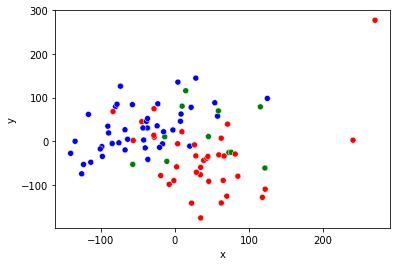

In [29]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, random_state=14)
principalComponents = pca.fit_transform(X)
plot.plot_cluster(principalComponents, df)

There is no clear separation between groups when looking at PC1 and PC1. Next, we check if tSNE can visually better separate the clusters. Because tSNE does not work well with high-dimensionality, we first reduce the dimensions with a PCA

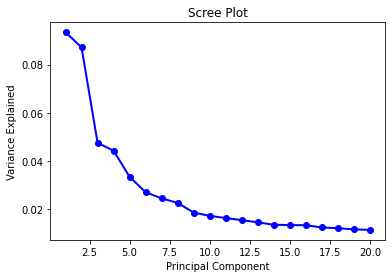

In [30]:
#Creating a 2D visualization to visualize the clusters
from sklearn.manifold import TSNE
pca = PCA(n_components=20, random_state=14)
pc = pca.fit_transform(X)

PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

As seen in the scree plot, there is the elbow at 4 components, so we plot the tSNE data with the PCA of 4 components and use these 4 components for our clustering as well

In [31]:
pca = PCA(n_components=4, random_state=14)
pc = pca.fit_transform(X)

## tSNE

## `perplexity`

In [32]:
# Perplexity of N^0.5 should in theory give good separation. We will still check this.
len(df)**(1/2)

9.433981132056603

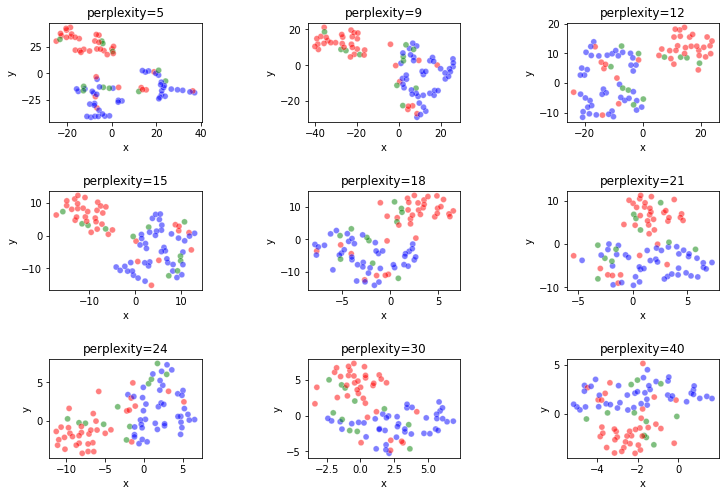

In [33]:
p = [5, 9, 12, 15, 18, 21, 24, 30, 40]
fig = plt.figure(figsize=(12, 8))
plt.subplots_adjust(wspace=0.7, hspace=0.7)
for i in range(9):
    ax = fig.add_subplot(3, 3, i+1)
    X_embedded = TSNE(n_components=2, learning_rate='auto', init='random', perplexity = p[i], random_state = 42)
    X_embedded = X_embedded.fit_transform(pc)
    plot.plot_sub_cluster(X_embedded, df)
    ax.set_title(f'perplexity={p[i]}')
plt.show()

Perplexity of 9 does indeed give the best separation

## `method`

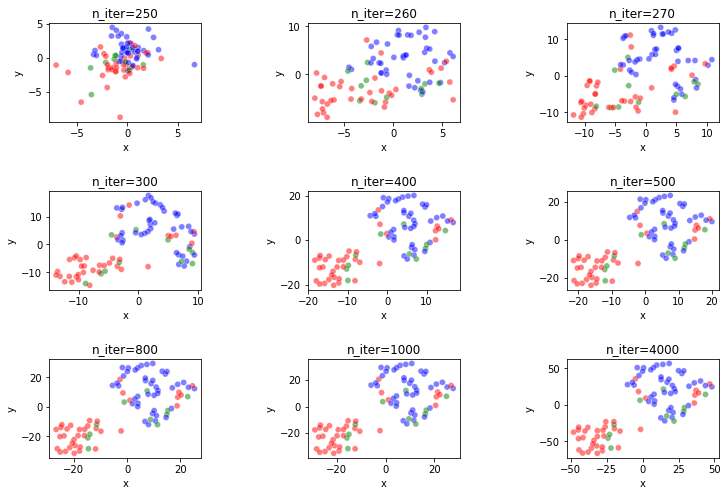

In [36]:
p = [250, 260, 270, 300, 400, 500, 800, 1000, 4000]
fig = plt.figure(figsize=(12, 8))
plt.subplots_adjust(wspace=0.7, hspace=0.7)
for i in range(9):
    ax = fig.add_subplot(3, 3, i+1)
    X_embedded = TSNE(n_components=2, learning_rate='auto', init='random', 
                      perplexity = 9, 
                      random_state = 42, 
                      method = 'exact',
                      n_iter = p[i])
    X_embedded = X_embedded.fit_transform(pc)
    plot.plot_sub_cluster(X_embedded, df)
    ax.set_title(f'n_iter={p[i]}')
plt.show()

The best separation is reached after 500 iterations

### Optimal tSNE visualization

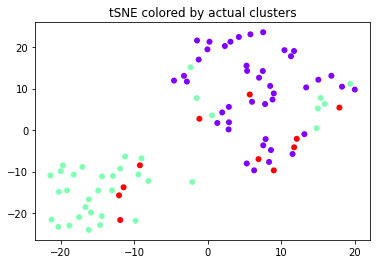

In [37]:
tsne = TSNE(n_components=2, learning_rate='auto', init='random', 
                      perplexity = 9, 
                      random_state = 42, 
                      method = 'exact',
                      n_iter = 500)
Y = tsne.fit_transform(pc)

scatter = plt.scatter(Y[:,0],Y[:,1],  c=y, cmap = 'rainbow', edgecolor = "None", alpha=1)
plt.title('tSNE colored by actual clusters')
plt.show()

While tSNE still does not give great visual separation, it is clearly superior to PCA. Therefore, the cluster methods will be plotted onto the tSNE to verify which cluster gives the best separation.

# Clustering

The data does not appear to have clear circular clusters of data, so k-means is not appropriate. Due to this reason, and the high-dimensionality of the data, OPTIC clustering and Hierarchical clustering will be investigated. These were pointed out as possibly good methods for gene expression by Yu et al. (2017) (https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0171429)

# OPTICS

OPTICS (Ordering Points To Identify the Clustering Structure) clusters based on density. It uses a similar principal as DBSCAN, except OPTICS uses orders the data such that spatially close point become neighbors. OPTICS is preferred in this case, as it is faster for big datasets and knows how to handle data with varying density.


The hyperparameters that can be tweaked for the OPTICS method will be optimized below:

In [39]:
from sklearn.cluster import OPTICS

## `metric`

https://bmcbioinformatics.biomedcentral.com/articles/10.1186/1471-2105-15-S2-S2
For clustering of gene expression data, Jaskowiak et al. 2014 found that the the optimal metric for distance computation is 'cosine'. We will check if it is indeed better than the default 'minkowski' metric.

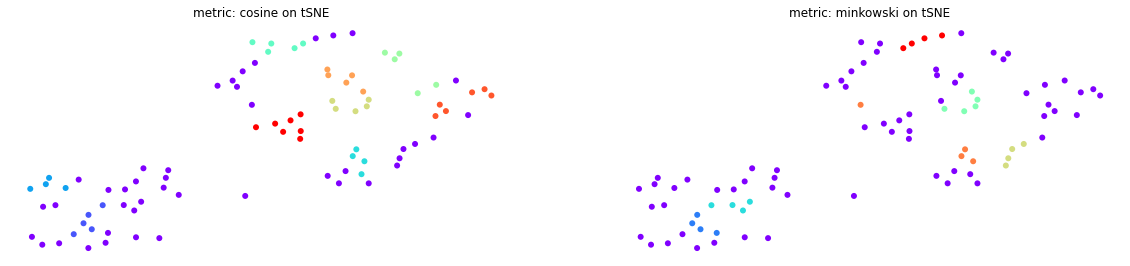

In [40]:
# Instantiate variables to loop over
subplots = [421,422,423,424,425,426,427,428]
metrics_ = ['cosine','minkowski']

count = 0
f = plt.figure(figsize=(20,20))
for metric in metrics_:
    optic = OPTICS(metric=metric, min_samples=2, min_cluster_size=0.05).fit(pc)
    oY = optic.fit_predict(pc)
    plt.subplot(subplots[count])
    plt.scatter(Y[:,0],Y[:,1],  c=oY, cmap = 'rainbow', edgecolor = "None", alpha=1)
    plt.title(f'metric: {metric} on tSNE')
    plt.axis('off')
    count += 1

The cosine method can better differentiate between different groupings of samples

In [41]:
opt_metric = 'cosine'

## `cluster_method`

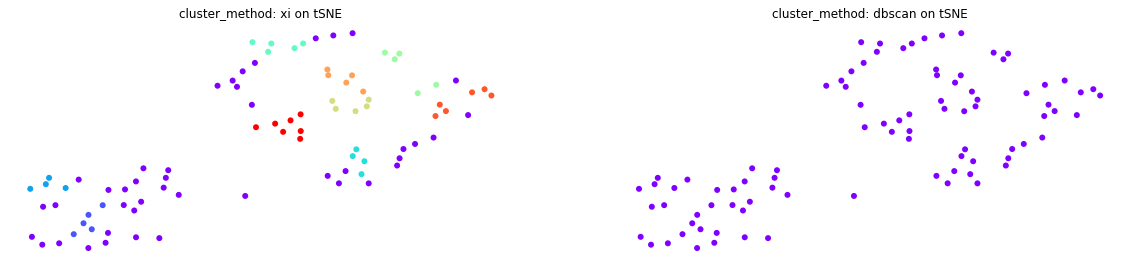

In [42]:
cluster_methods = ['xi','dbscan']

count = 0
f = plt.figure(figsize=(20,20))
for cluster_method in cluster_methods:
    optic = OPTICS(metric=opt_metric, min_samples=2, min_cluster_size=0.05,
                  cluster_method=cluster_method).fit(pc)
    oY = optic.fit_predict(pc)
    plt.subplot(subplots[count])
    plt.scatter(Y[:,0],Y[:,1],  c=oY, cmap = 'rainbow', edgecolor = "None", alpha=1)
    plt.title(f'cluster_method: {cluster_method} on tSNE')
    plt.axis('off')
    count += 1

As seen in the plots, `xi` is better to find clusters in this dataset

In [43]:
cluster_method = 'xi'

## `min_samples`

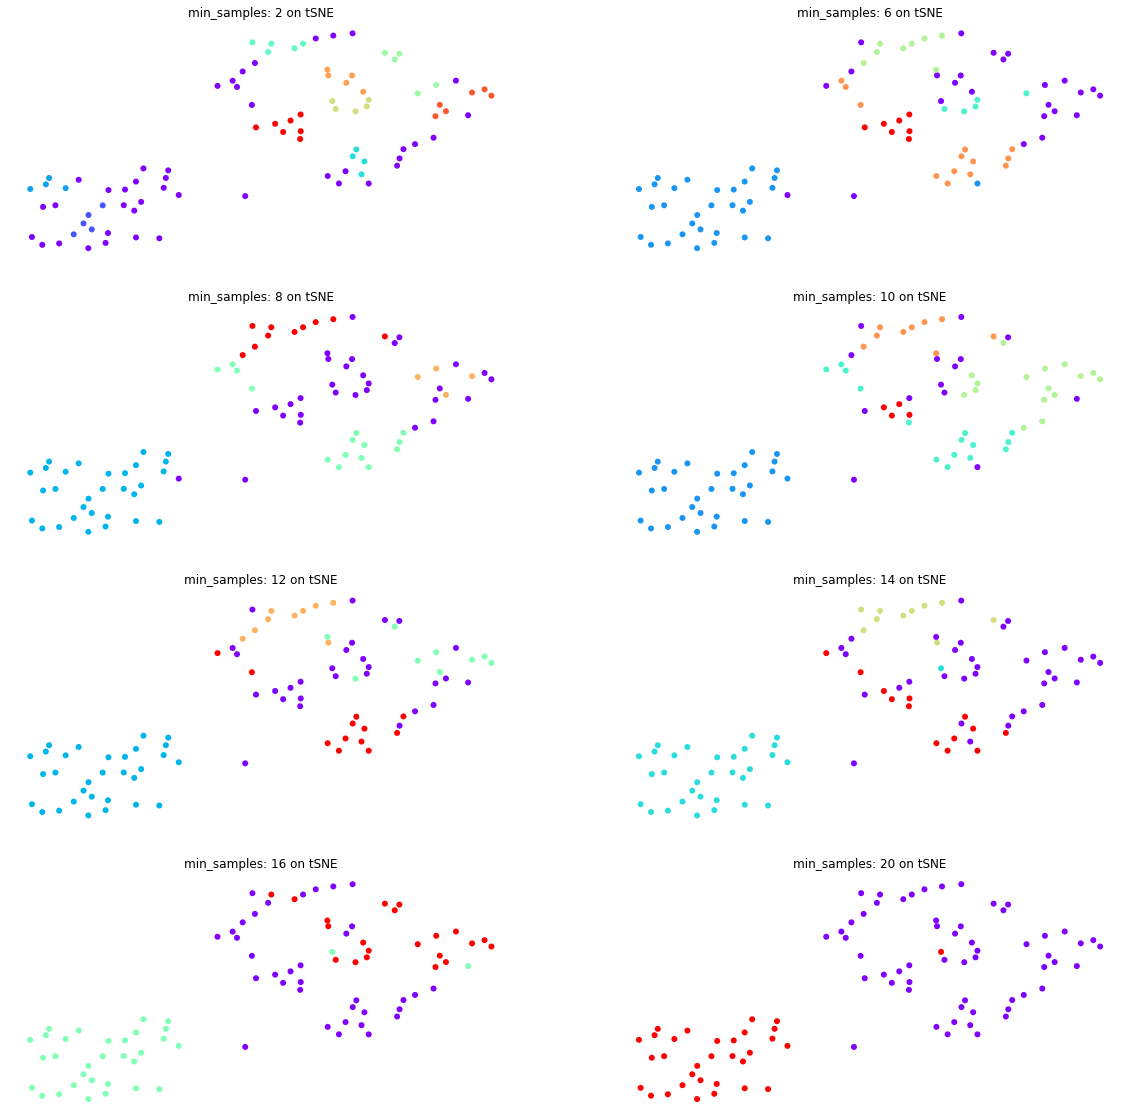

In [44]:
min_samples = [2,6,8,10,12,14,16,20]

count = 0
f = plt.figure(figsize=(20,20))
for mins in min_samples:
    optic = OPTICS(metric=opt_metric, min_cluster_size=0.05,
            cluster_method=cluster_method, min_samples=mins).fit(pc)
    oY = optic.fit_predict(pc)
    plt.subplot(subplots[count])
    plt.scatter(Y[:,0], Y[:,1],  c=oY, cmap = 'rainbow', edgecolor = "None", alpha=1)
    plt.title(f'min_samples: {mins} on tSNE')
    plt.axis('off')
    count += 1

`min_samples` of 10 seems to capture the smaller cluster well and find the best subclusters in de bigger cluster on the right. A larger value, like 20, would more accurately cluster the two main clusters. However, that would a lot of sensitivity, as the larger cluster does not look homogenous

In [45]:
min_sample = 10

## `min_cluster_size`

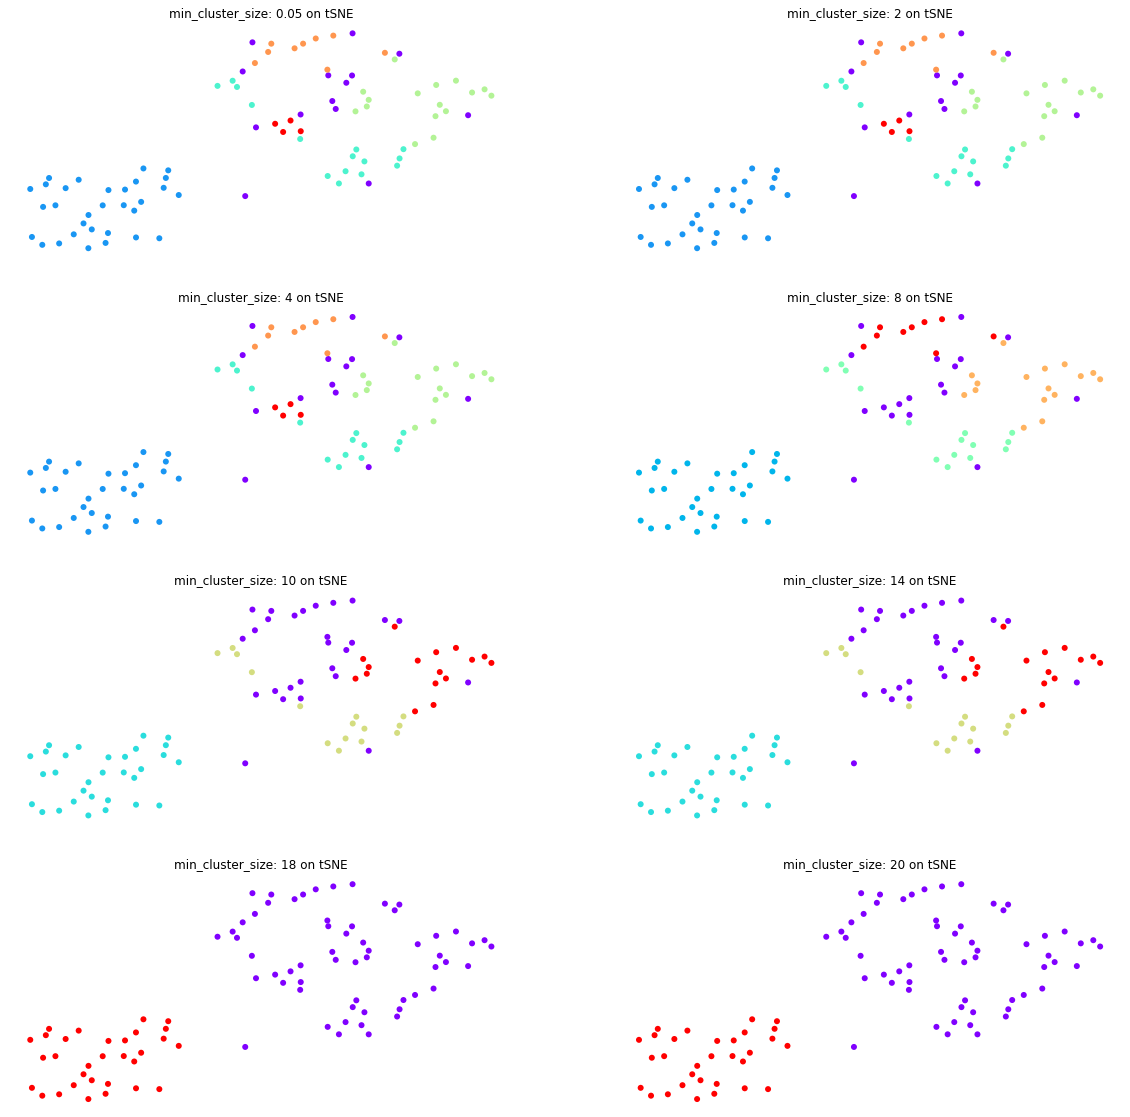

In [46]:
min_cluster_sizes = [0.05,2,4,8,10,14,18,20]

count = 0
f = plt.figure(figsize=(20,20))
for min_cluster in min_cluster_sizes:
    optic = OPTICS(metric=opt_metric, min_cluster_size=min_cluster,
            cluster_method=cluster_method, min_samples=min_sample).fit(pc)
    oY = optic.fit_predict(pc)
    plt.subplot(subplots[count])
    plt.scatter(Y[:,0], Y[:,1],  c=oY, cmap = 'rainbow', edgecolor = "None", alpha=1)
    plt.title(f'min_cluster_size: {min_cluster} on tSNE')
    plt.axis('off')
    count += 1

There is a switch in clustering at `min_cluster_size`= 10. However, that loses some of the variability in the larger cluster. Therefore, the `min_cluster_size` is set at 8

In [47]:
min_cluster = 8

## Final clustering with OPTICS

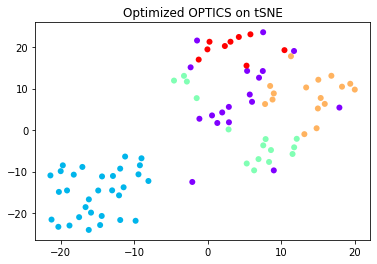

In [48]:
optic = OPTICS(metric=opt_metric, min_cluster_size=min_cluster,
                          cluster_method='xi', min_samples=min_sample).fit(pc)
oY = optic.fit_predict(pc)

plt.scatter(Y[:,0],Y[:,1],  c = oY, cmap = 'rainbow', edgecolor = "None", alpha=1)
plt.title('Optimized OPTICS on tSNE')
plt.show()

# Hierarchical clustering

Hierarchical clustering (HC) was chosen because it has been frequently succesfully used in gene expression studies. An agglomerative method was used, were each observation starts in their own cluster and they are paired when they move up the hierarchy.

( https://bmcbioinformatics.biomedcentral.com/articles/10.1186/1471-2105-7-S4-S19 )

In [49]:
from sklearn.cluster import AgglomerativeClustering

## `n_clusters`

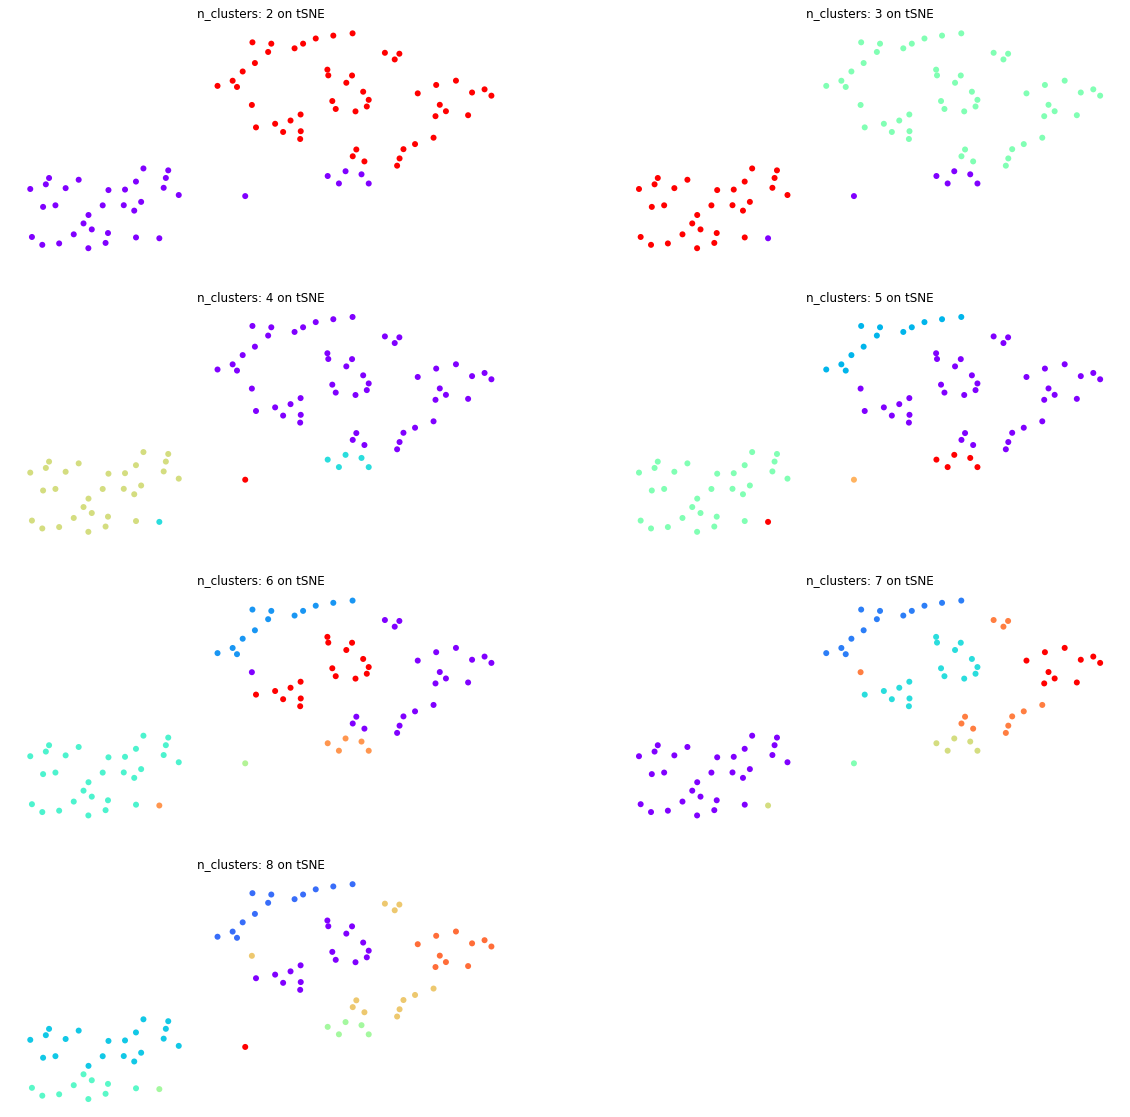

In [50]:
n_clusters = [2,3,4,5,6,7,8]

count = 0
f = plt.figure(figsize=(20,20))
for n_clust in n_clusters:
    hier = AgglomerativeClustering(n_clusters=n_clust, affinity='euclidean', linkage='ward')
    hY = hier.fit_predict(pc)
    plt.subplot(subplots[count])
    plt.scatter(Y[:,0],Y[:,1],  c=hY, cmap = 'rainbow', edgecolor = "None", alpha=1)
    plt.title(f'n_clusters: {n_clust} on tSNE')
    plt.axis('off')
    count += 1

At `n_clusters`= 6, the most clearly separated clusters are visible

In [51]:
n_cluster = 6

## `linkage`

We will check if ward, single, complete, or average linkages are better.

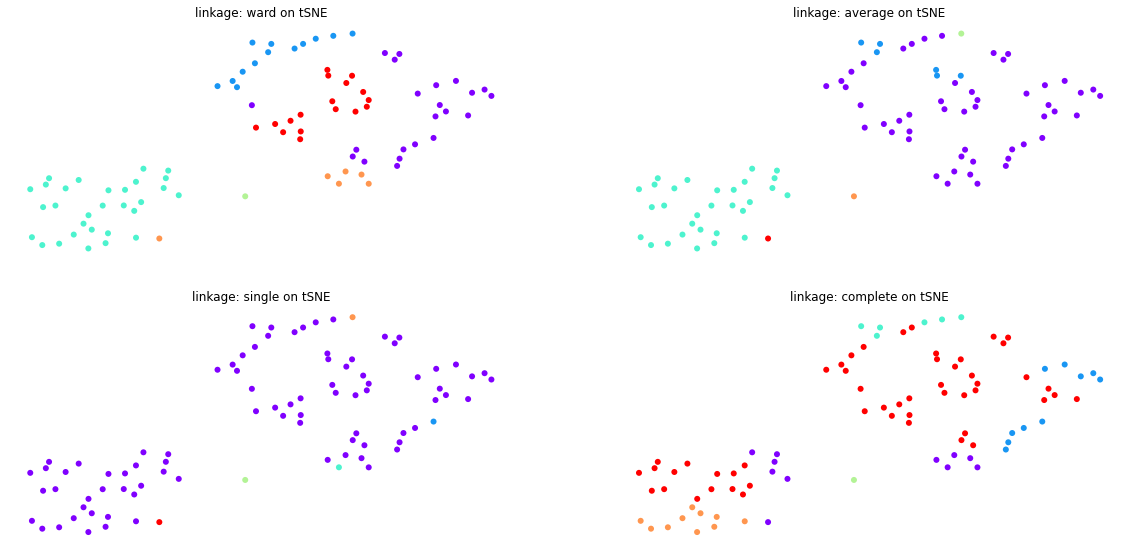

In [52]:
linkages = ['ward','average', 'single', 'complete']

count = 0
f = plt.figure(figsize=(20,20))
for linkage in linkages:
    hier = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage=linkage)
    hY = hier.fit_predict(pc)
    plt.subplot(subplots[count])
    plt.scatter(Y[:,0],Y[:,1],  c=hY, cmap = 'rainbow', edgecolor = "None", alpha=1)
    plt.title(f'linkage: {linkage} on tSNE')
    plt.axis('off')
    count += 1

The `ward` linkage gives the best results. With `ward`, however, the `affinity` can only be set on "euclidean". To see if other affinities give better results, we will use `average` for the affinity check.

## `affinity`

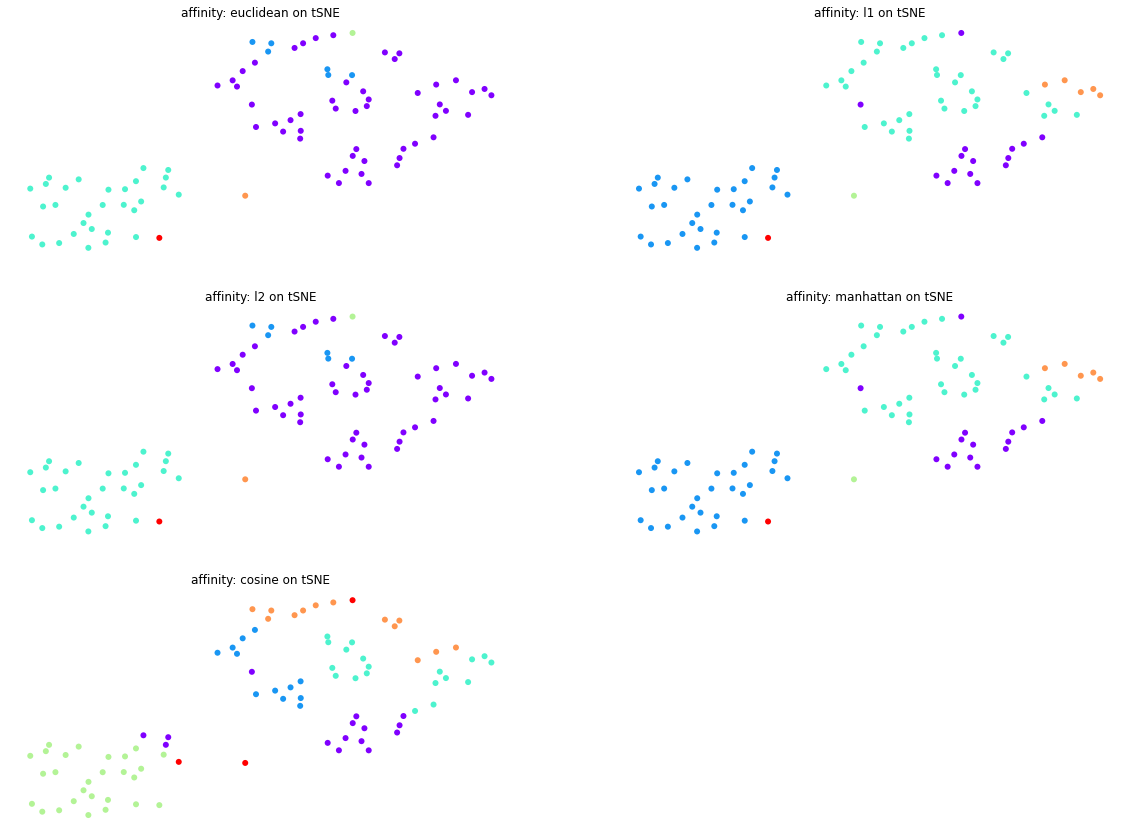

In [53]:
affinities = ['euclidean', 'l1', 'l2', 'manhattan', 'cosine']

count = 0
f = plt.figure(figsize=(20,20))
for affinity in affinities:
        hier = AgglomerativeClustering(n_clusters=6, affinity=affinity, linkage='average')
        hY = hier.fit_predict(pc)
        plt.subplot(subplots[count])
        plt.scatter(Y[:,0],Y[:,1],  c=hY, cmap = 'rainbow', edgecolor = "None", alpha=1)
        plt.title(f'affinity: {affinity} on tSNE')
        plt.axis('off')
        count += 1

The `ward` linkage still gives the optimal results

## Final clustering with Hierarchical clustering

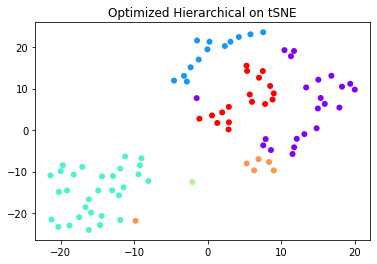

In [54]:
hier = AgglomerativeClustering(n_clusters=6, linkage='ward')
hY = hier.fit_predict(pc)
plt.scatter(Y[:,0],Y[:,1],  c = hY, cmap = 'rainbow', edgecolor = "None", alpha=1)
plt.title('Optimized Hierarchical on tSNE')
plt.show()

# Comparison of algorithms

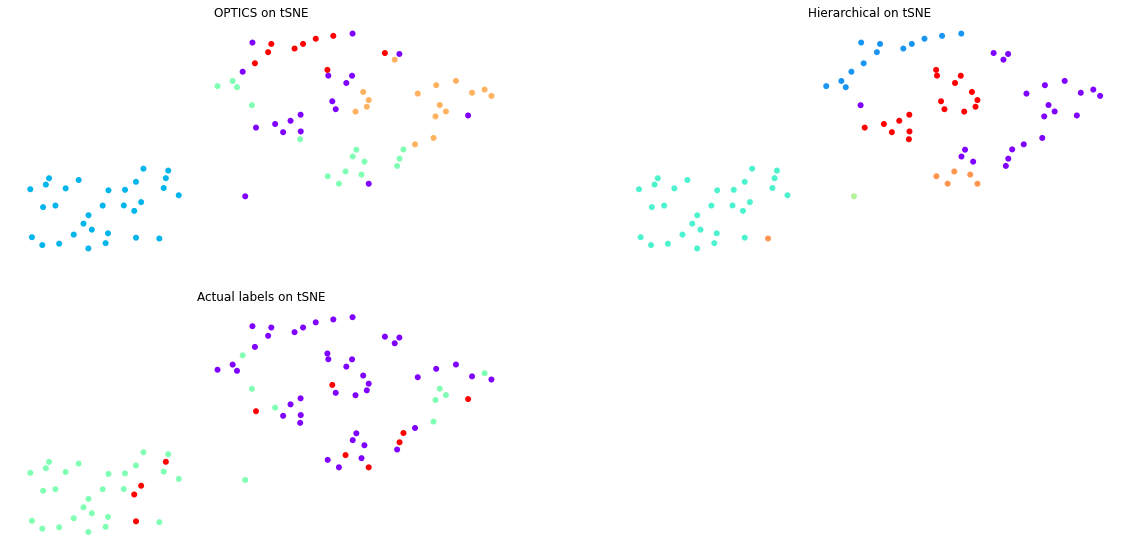

In [55]:
clusterings = [oY, hY, y]
clust_names = ['OPTICS', 'Hierarchical', 'Actual labels']

count = 0
f = plt.figure(figsize=(20,20))
for clustering in clusterings:
        plt.subplot(subplots[count])
        plt.scatter(Y[:,0],Y[:,1],  c=clustering, cmap = 'rainbow', edgecolor = "None", alpha=1)
        plt.title(f'{clust_names[count]} on tSNE')
        plt.axis('off')
        count += 1

On first sight, the two clustering methods yield similar results. What's become clear from this analysis, is that there are at least two apparent clusters in this cancer gene expression data. As seen in the OPTICS, hierarchical, and also a bit in the actual labeling above, is that there is a mix in the right, larger cluster. The left cluster, however, is quite homogenous.

We can score how well these clusters scored compared to the actual labels:

In [60]:
from sklearn.metrics import adjusted_rand_score, fowlkes_mallows_score
print(f'The ARS of OPTICS is: {adjusted_rand_score(oY, y)}')
print(f'The ARS of HC is: {adjusted_rand_score(hY, y)}')
print(f'The FMS of OPTICS is: {fowlkes_mallows_score(oY, y)}')
print(f'The FMS of HC is: {fowlkes_mallows_score(hY, y)}')

The ARS of OPTICS is: 0.269190868920718
The ARS of HC is: 0.2717627144997597
The FM of OPTICS is: 0.4975409272809393
The FM of HC is: 0.5007247199622695


Both methods score very poorly on ARS, and also poor on the FM (out of 1).

Lastly, we can check what genes had the highest weights in the first two Principal Components. These are not exact representations of how the clusters were made but it represents the genes that explain the most variance between subjects. Evaluating these could help more easily identify the cancer histology and possibly help find a cure for this disease.

C:\Users\jarom\DataScience3\Unsupervised_ML\Plotting.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  max_loadings_pc = top_pc.append(bottom_pc)


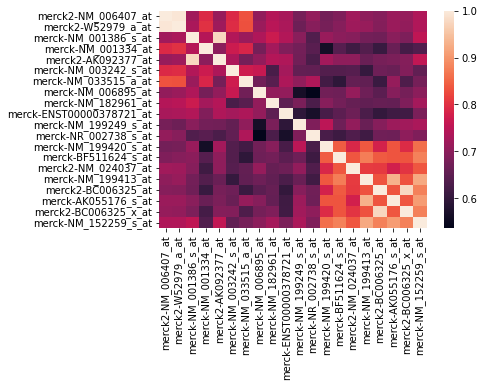

In [61]:
import seaborn as sns
pca_fit = pca.fit(X)
plot.plot_pca_comp(pca_fit, X_df, 'PC1')

These are the first 20 genes with the highest weights for the first principal component. Some of these are also highly correlated with each other, as denoted by light pink colour in the heatmap. Their decreased or increased expression may play a role in cancer development.

# Conclusions

This notebook investigated clustering of gene expression to identify different lung cancer histologies. Dimensionality reduction was done with PCA. Clustering was done with OPTICS and HC and were both equally good at clustering. They were able to quite accurately cluster squamous carcinomas from the other histologies. However, the larger cluster, of which we actually know it was mainly Adenocarcinomas, there was quite a big spread between the datapoints. This led to several smaller clusters being found by both algorithms. Further research could combine histology with the severeness of the cancer, like tumor size and stage, to find better clustering. Additionally, more complex clustering methods, like ensemble methods, could be used for better results.